# Puzzle 1: Overparameterized Neural Networks

Consider 2 neural networks, A and B, that are used to perform standard linear regression. Network A contains a single layer of input neurons and a single output layer with no non-linearity. Network B contains a single layer of input neurons, a _single_ hidden neuron (again, with no non-linearity), and an output neuron. If trained with gradient descent with a small learning rate, which network will typically train faster? Assume small near-zero initializations for the weights.

Is it A) **Network A** or B) **Network B** or C) **both networks train equally fast**?

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from matplotlib import rcParams
from utils import *

params = {
   'axes.labelsize': 16,
    'axes.titlesize': 20,
   'font.size': 20,
   'legend.fontsize': 16,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
    'font.family':"sans-serif",
   'font.sans-serif':'Arial',
    'figure.facecolor': 'black',
    'savefig.facecolor': 'black',
    'axes.facecolor': 'black',   # axes background color
    
    "figure.edgecolor": "black",
    "savefig.edgecolor": "black",
    
   'text.usetex': False,

   }

plt.style.use(['dark_background'])
rcParams.update(params)
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


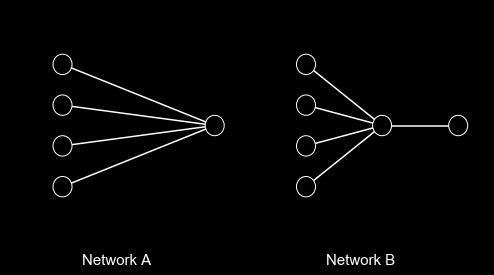

In [2]:
f, axs = plt.subplots(1,2,figsize=(8,4), facecolor='black')
plt.rc("font",family="sans-serif",size=14)

ax = axs[0]
ax.axis('off')
draw_neural_net(ax, .15, .9, .1, .85, [4, 1])
ax.annotate('Network A', (0,0), (50, -25), xycoords='axes fraction', textcoords='offset points', va='top', size=15,);

ax = axs[1]
ax.axis('off')
draw_neural_net(ax, .15, .9, .1, .85, [4, 1, 1])
ax.annotate('Network B', (0,0), (50, -25), xycoords='axes fraction', textcoords='offset points', va='top', size=15,);

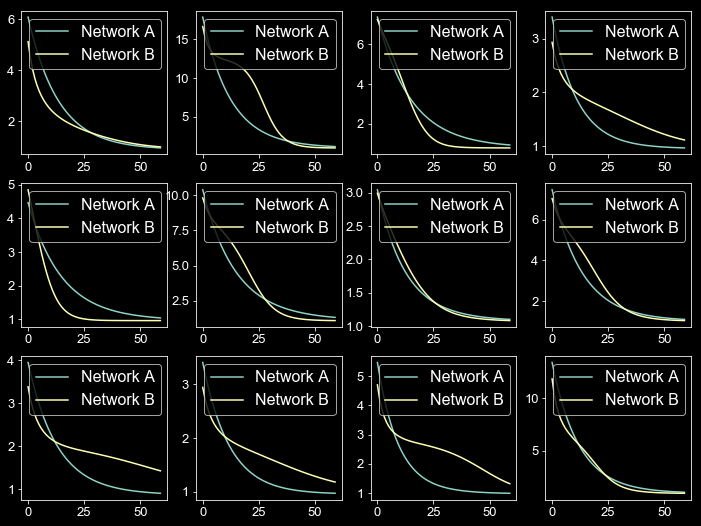

In [10]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K
import random as rn, tensorflow as tf, keras

n = 200; d = 5

fig, axes = plt.subplots(3, 4, figsize=[12, 9], facecolor='black')

for i in range(12):
    np.random.seed(i)
    x = np.random.normal(0,1,(n,d))
    w = np.random.normal(0,1,(d,1))
    y = x.dot(w) 
    y = y + 1*np.random.normal(0,1,y.shape)

    np.random.seed(42)
    rn.seed(12345)
    session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.set_random_seed(1234)
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    K.set_session(sess)

    inputs_a = Input(shape=(d,))
    preds_a = Dense(1,activation='linear')(inputs_a)
    sgd=keras.optimizers.SGD()

    model_a = Model(inputs=inputs_a,outputs=preds_a)
    model_a.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
    history_a = model_a.fit(x, y, batch_size=128, epochs=60, shuffle=False, verbose=0)

    np.random.seed(42)
    rn.seed(12345)
    session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.set_random_seed(1234)
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    K.set_session(sess)

    inputs_b = Input(shape=(d,))
    hidden_b = Dense(1,activation='linear')(inputs_b)
    preds_b = Dense(1,activation='linear')(hidden_b)
    sgd=keras.optimizers.SGD()

    model_b = Model(inputs=inputs_b,outputs=preds_b)
    model_b.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
    history_b = model_b.fit(x, y, batch_size=128, epochs=60, shuffle=False, verbose=0)
    
    ax = axes[i%3,int(i/3)]
    ax.plot(history_a.history['loss'], label='Network A')
    ax.plot(history_b.history['loss'], label='Network B')
    ax.legend()